In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode,skew,skewtest

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cross_validation import StratifiedKFold,train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [2]:
train=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/Income Levels/train.csv')
test=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/Income Levels/test.csv')

In [3]:
train.columns

Index([u'age', u'class_of_worker', u'industry_code', u'occupation_code',
       u'education', u'wage_per_hour', u'enrolled_in_edu_inst_lastwk',
       u'marital_status', u'major_industry_code', u'major_occupation_code',
       u'race', u'hispanic_origin', u'sex', u'member_of_labor_union',
       u'reason_for_unemployment', u'full_parttime_employment_stat',
       u'capital_gains', u'capital_losses', u'dividend_from_Stocks',
       u'tax_filer_status', u'region_of_previous_residence',
       u'state_of_previous_residence', u'd_household_family_stat',
       u'd_household_summary', u'migration_msa', u'migration_reg',
       u'migration_within_reg', u'live_1_year_ago', u'migration_sunbelt',
       u'num_person_Worked_employer', u'family_members_under_18',
       u'country_father', u'country_mother', u'country_self', u'citizenship',
       u'business_or_self_employed', u'fill_questionnaire_veteran_admin',
       u'veterans_benefits', u'weeks_worked_in_year', u'year',
       u'income_level'

In [4]:
train.shape,test.shape

((199523, 41), (99762, 41))

In [5]:
#Number of features

train.shape

(199523, 41)

In [6]:
train.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary               

In [7]:
train.dtypes

age                                  int64
class_of_worker                     object
industry_code                        int64
occupation_code                      int64
education                           object
wage_per_hour                        int64
enrolled_in_edu_inst_lastwk         object
marital_status                      object
major_industry_code                 object
major_occupation_code               object
race                                object
hispanic_origin                     object
sex                                 object
member_of_labor_union               object
reason_for_unemployment             object
full_parttime_employment_stat       object
capital_gains                        int64
capital_losses                       int64
dividend_from_Stocks                 int64
tax_filer_status                    object
region_of_previous_residence        object
state_of_previous_residence         object
d_household_family_stat             object
d_household

In [8]:
#We will impute the null values.

#State of previous residence

train=train.fillna(value={'state_of_previous_residence':train['state_of_previous_residence'].mode()[0]})

In [9]:
#Hispanic Origin

train['hispanic_origin'].value_counts()

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64

In [10]:
train=train.fillna(value={'hispanic_origin':train['hispanic_origin'].mode()[0]})

In [11]:
#For other missing values we replace them with Unavailable

train=train.fillna(value='Unavailable')

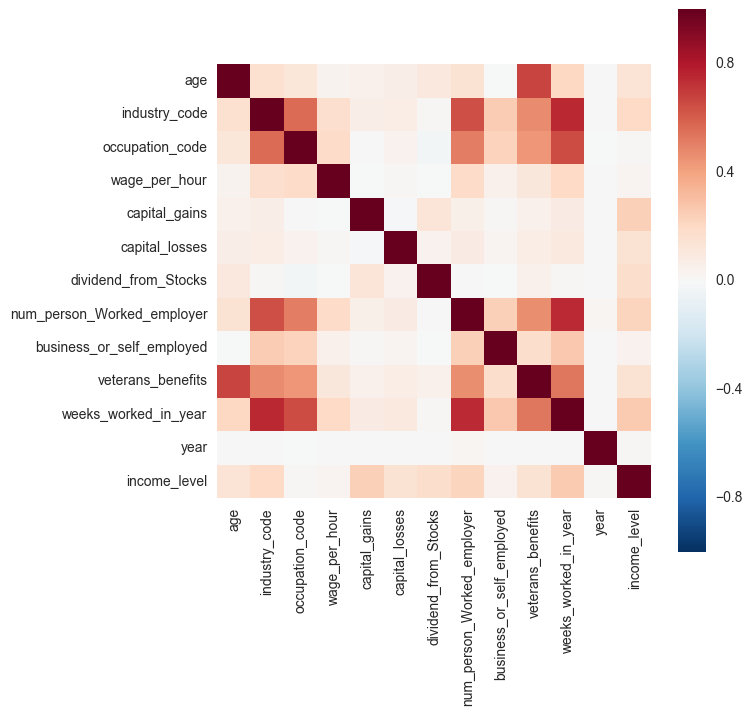

In [12]:
#Now lets check for correlation among the numerical variables

corr = train.select_dtypes(['float64','int64']).corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, vmax=1, square=True)

From the above we see that the variables **are not so related with income**. However some variables are related with each 
other as seen in the matrix.

## Data visualization
We will look at the features and see how they vary with respect to the target variable and with respect to each other and draw some conclusions from them.

### Age

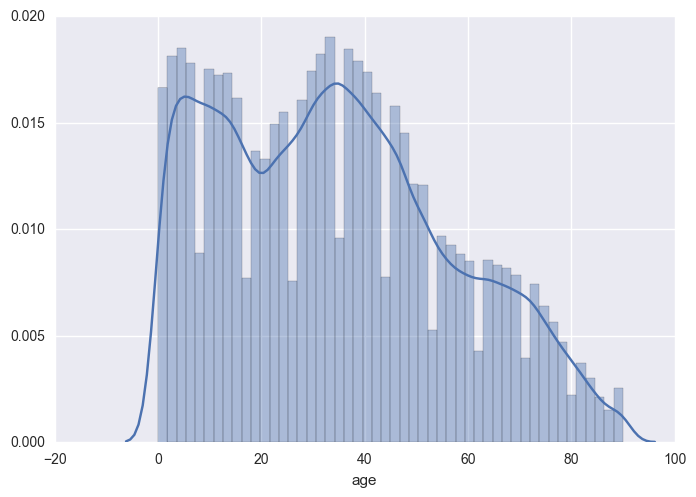

In [13]:
sns.distplot(train['age'])

In [14]:
#Class of worker

train['class_of_worker'].value_counts()

Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: class_of_worker, dtype: int64

This will obviously affect the income and lets analyze its relationship with income

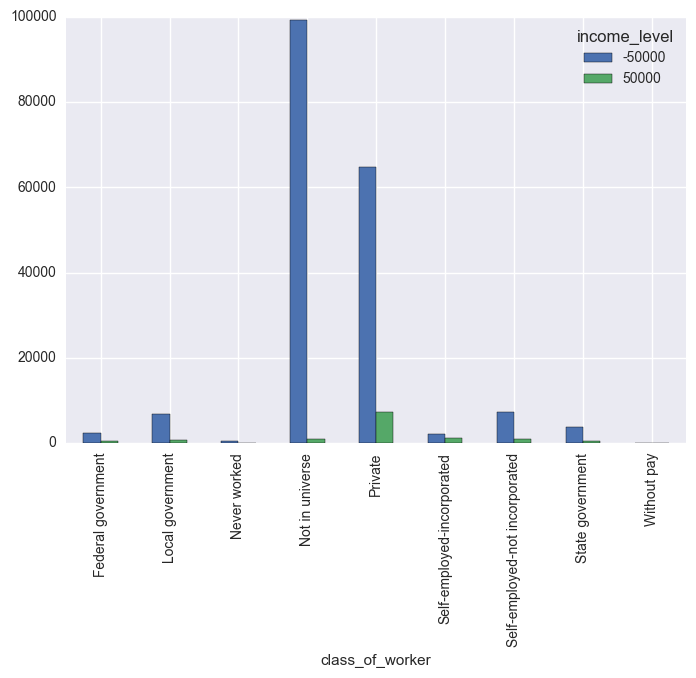

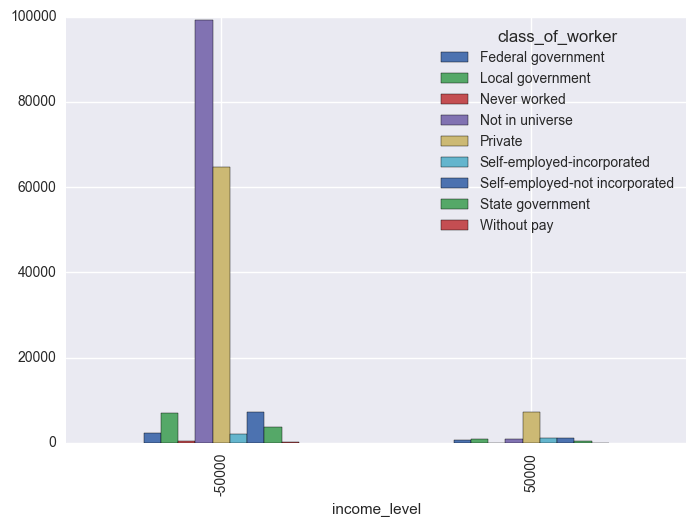

In [15]:

plt.figure(1)
pd.crosstab(train['class_of_worker'],train['income_level']).plot(kind='bar')

plt.figure(2)
pd.crosstab(train['income_level'],train['class_of_worker']).plot(kind='bar')

We see that there are very less workers except Private in which the income is more than 50000. Lets see what effect age has on the income

In [16]:
bins=[0,10,20,30,40,50,60,70,80,90]
group_labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
train['age_categories']=pd.cut(train['age'], bins, labels=group_labels)

In [17]:
test['age_categories']=pd.cut(test['age'], bins, labels=group_labels)

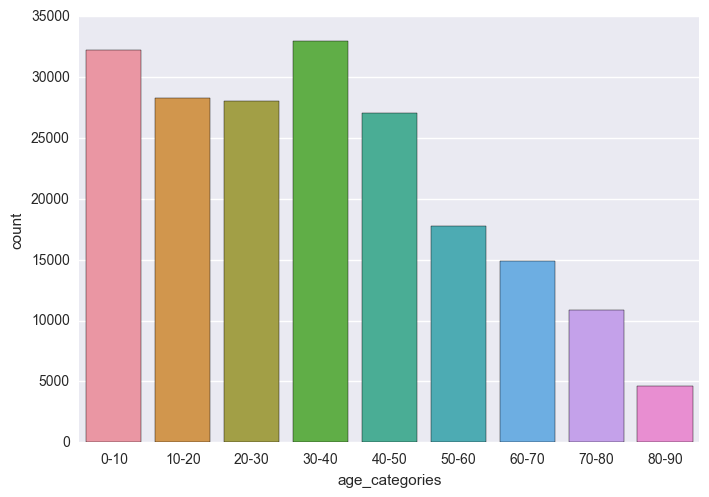

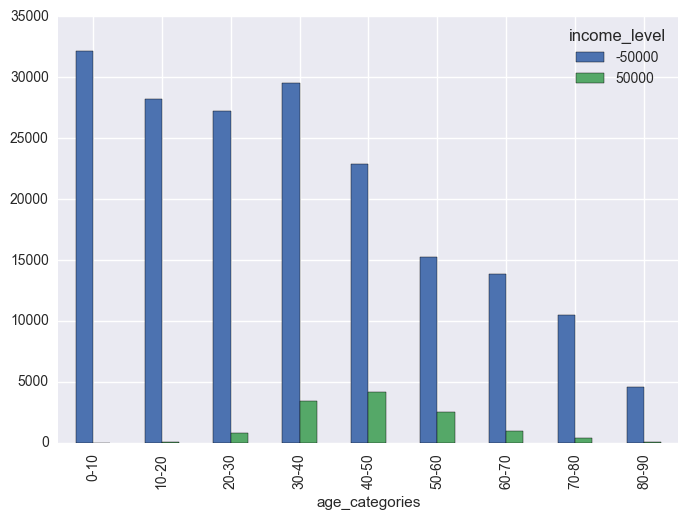

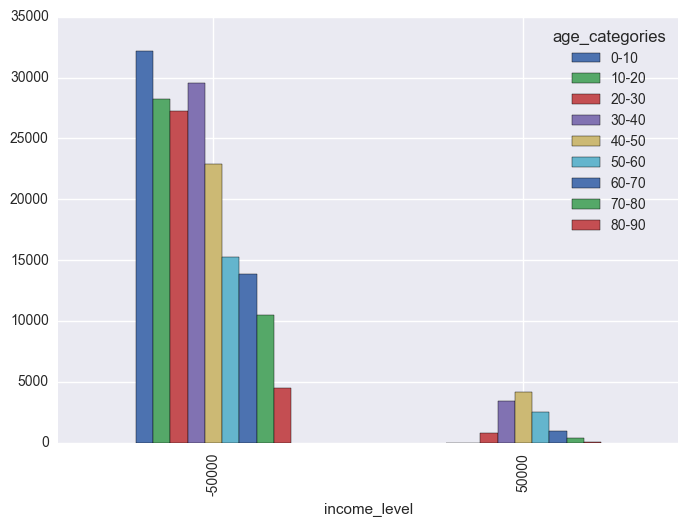

In [18]:
plt.figure(1)
sns.countplot(train['age_categories'])

plt.figure(2)
pd.crosstab(train['age_categories'],train['income_level']).plot(kind='bar')

plt.figure(3)
pd.crosstab(train['income_level'],train['age_categories']).plot(kind='bar')



### Education

In [19]:
train['education'].value_counts()

High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

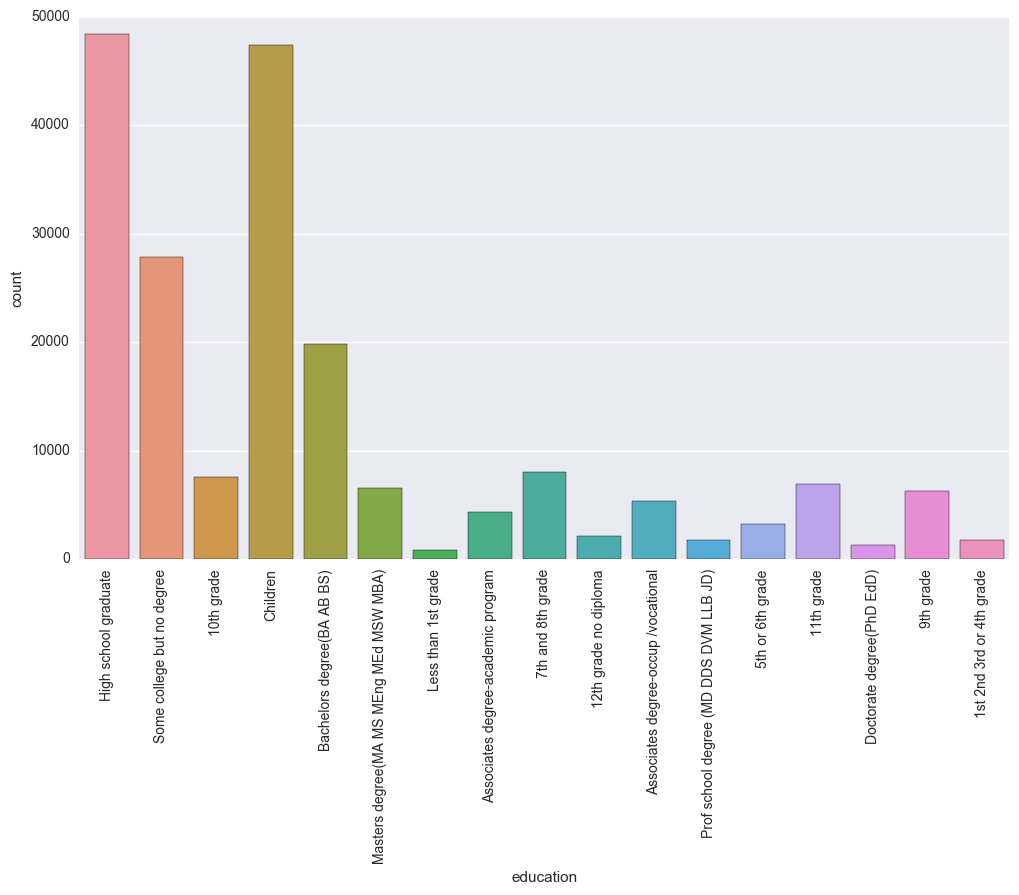

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(train['education'])
ax=plt.xticks(rotation=90)

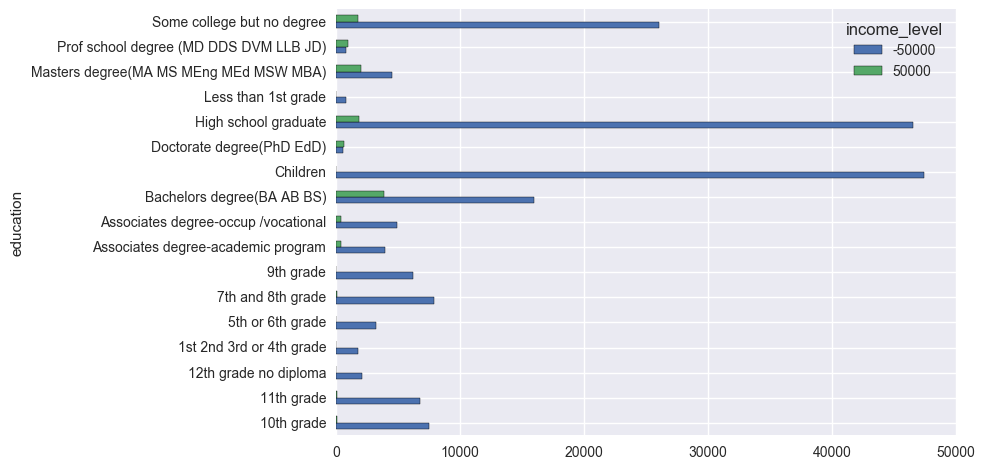

In [21]:
plt.figure(2)
pd.crosstab(train['education'],train['income_level']).plot(kind='barh')

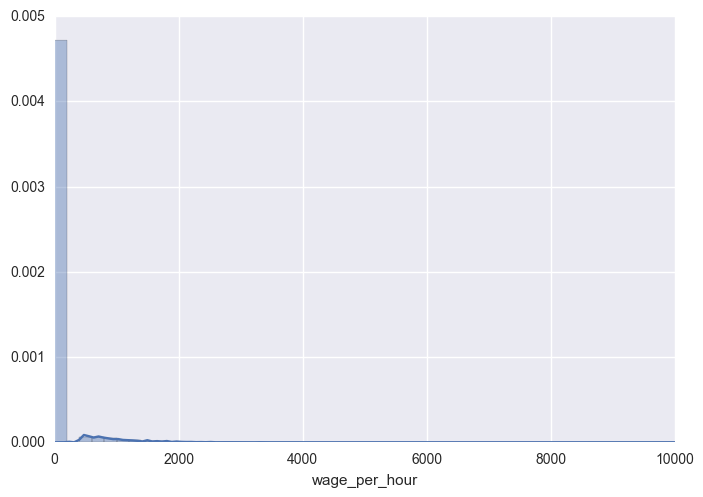

In [22]:
#Wage per hour. 

sns.distplot(train['wage_per_hour'])

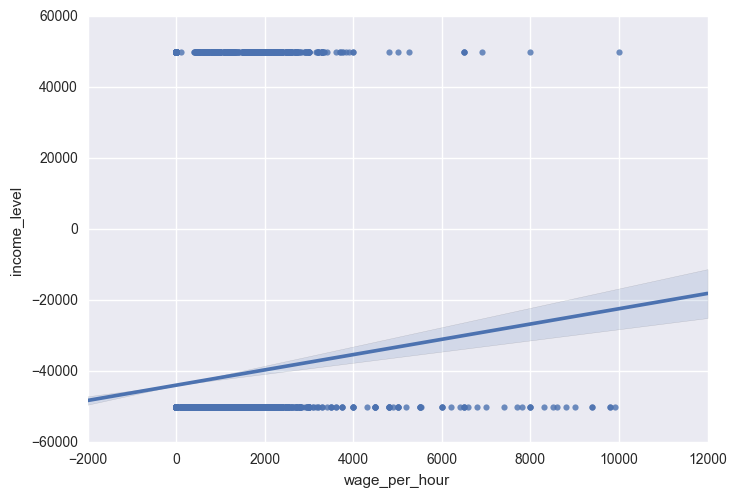

In [23]:
sns.regplot(data=train,x='wage_per_hour',y='income_level')

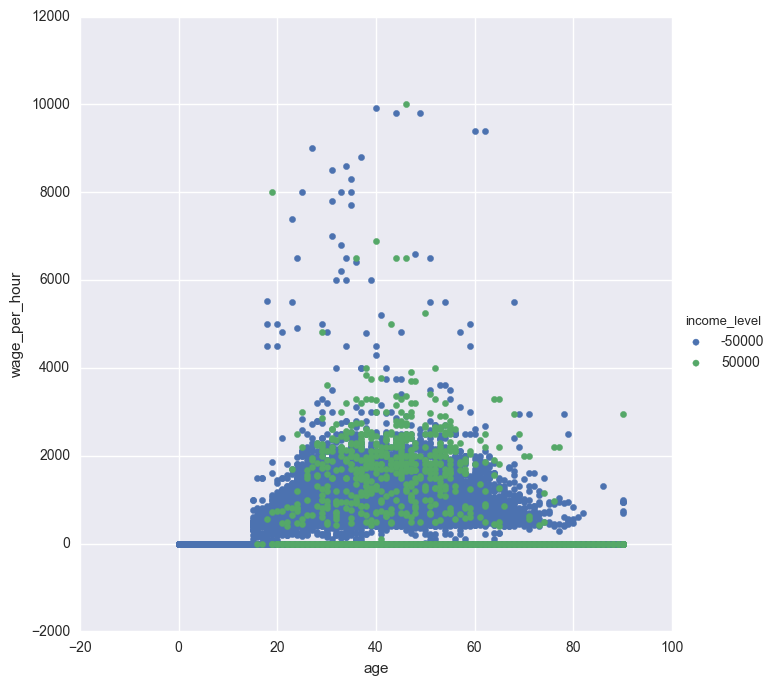

In [24]:
g=sns.FacetGrid(train,hue='income_level',size=7)
g.map(plt.scatter,"age","wage_per_hour").add_legend()

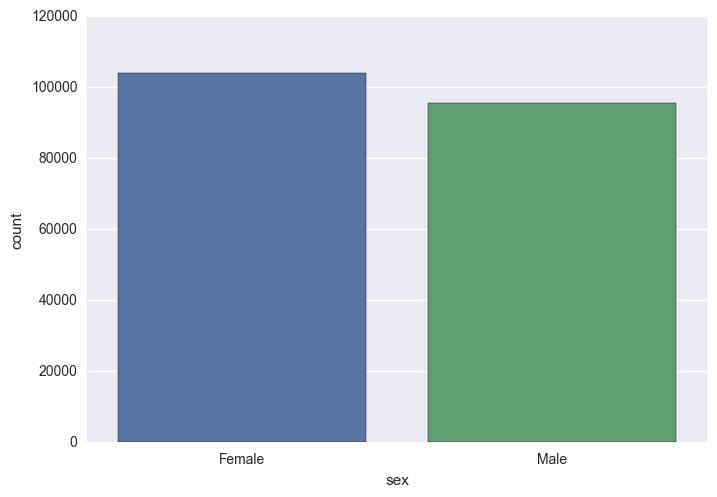

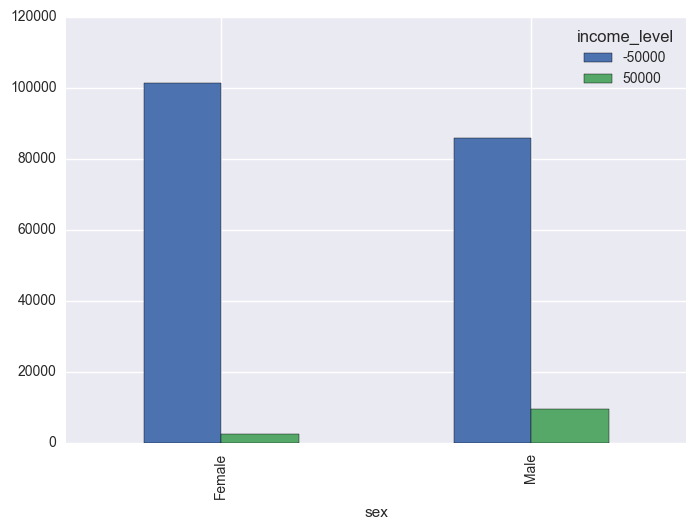

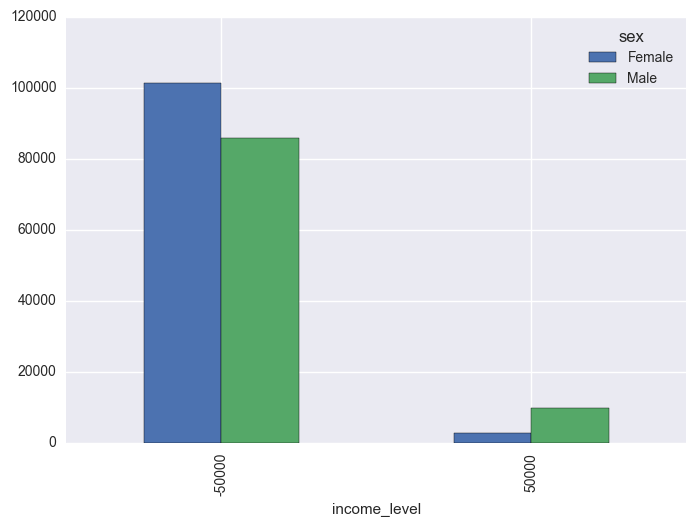

In [25]:
#We see that most of the people with income greater than 50k are in age grp of 20-60 and earn a wage of 2000-4000 per
#hour


#Sex

plt.figure(1)
sns.countplot(train['sex'])

plt.figure(2)
pd.crosstab(train['sex'],train['income_level']).plot(kind='bar')

plt.figure(3)
pd.crosstab(train['income_level'],train['sex']).plot(kind='bar')

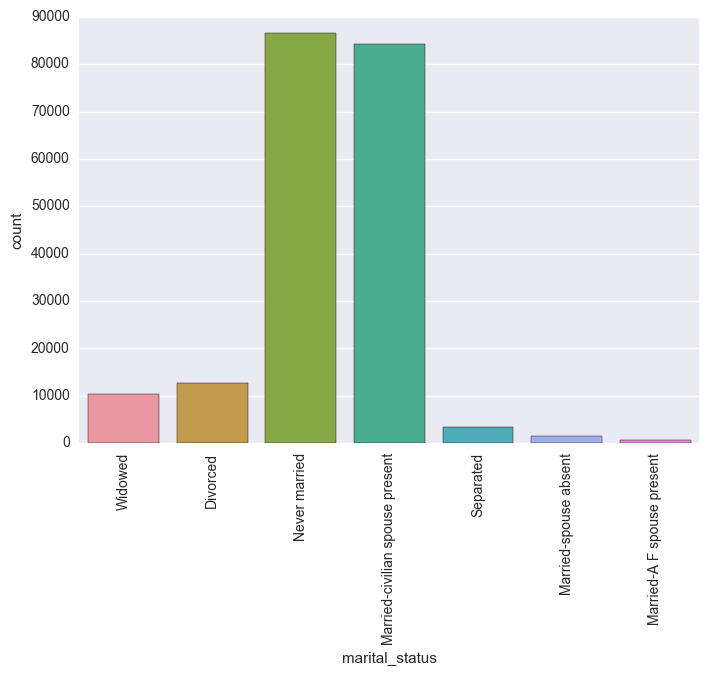

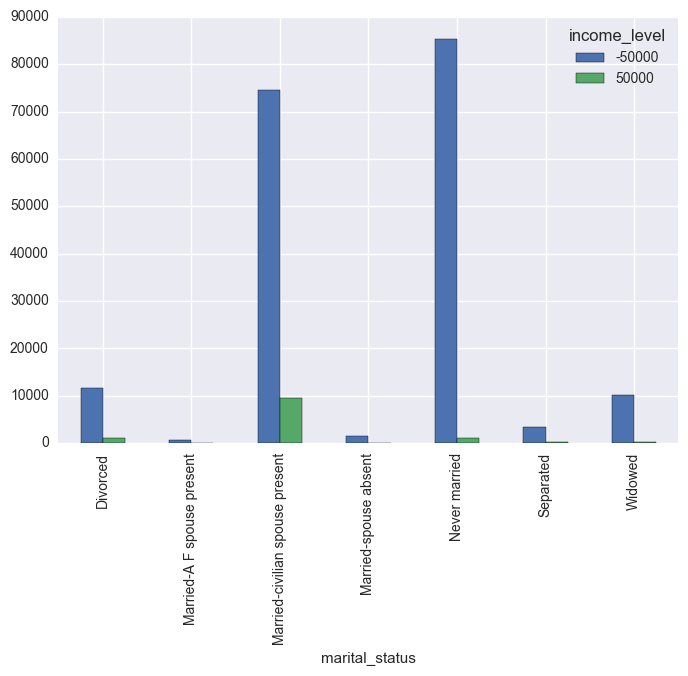

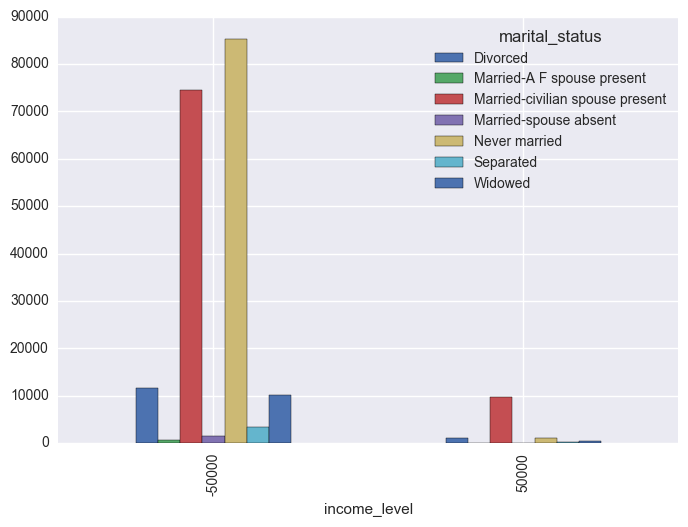

In [26]:
#So we observe that clearly the males have more chances of having incomes greater than 500000 than females.

#Marital Status
plt.figure(1)
sns.countplot(train['marital_status'])
ax=plt.xticks(rotation=90)

plt.figure(2)
pd.crosstab(train['marital_status'],train['income_level']).plot(kind='bar')

plt.figure(3)
pd.crosstab(train['income_level'],train['marital_status']).plot(kind='bar')

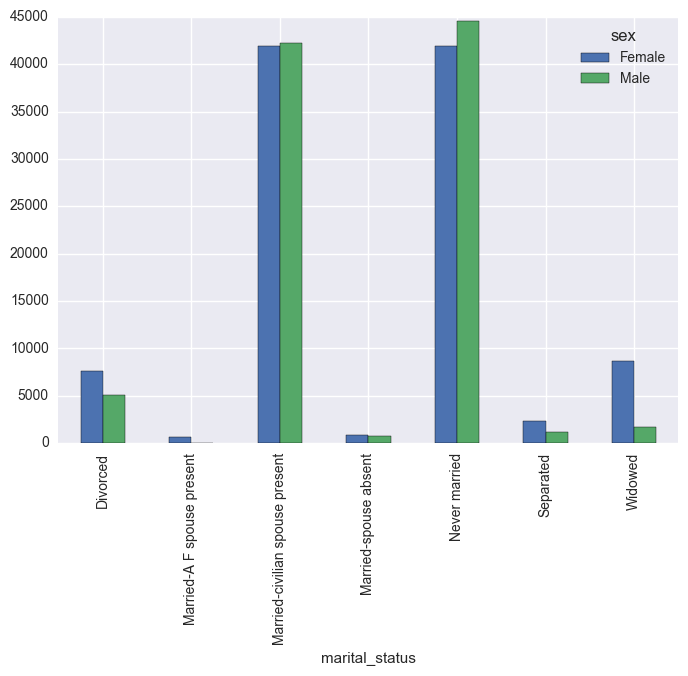

In [27]:
#So clearly the married people have more chances of having incomes greater than 500000 and even in them those who
#have married-civilian spouse present

#Relation between Sex and Marital Status

plt.figure(1)
pd.crosstab(train['marital_status'],train['sex']).plot(kind='bar')

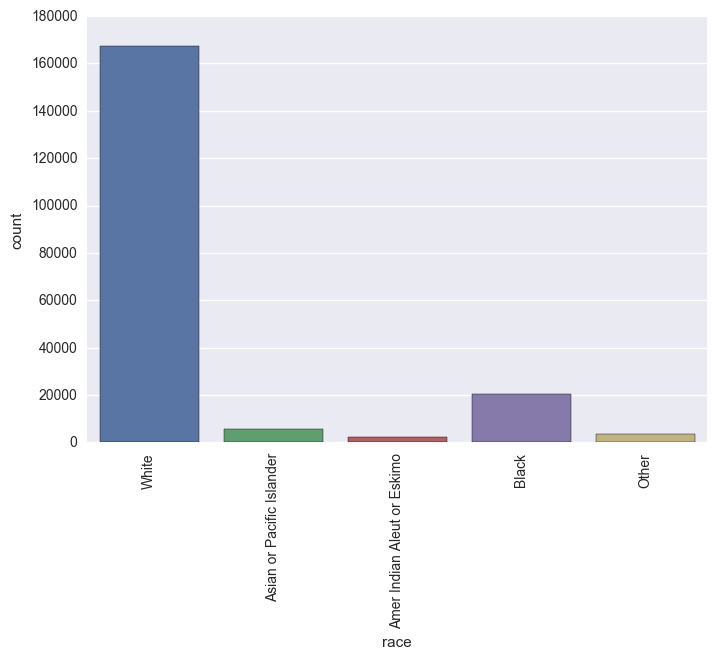

In [28]:
#Race

sns.countplot(train['race'])
ax=plt.xticks(rotation=90)

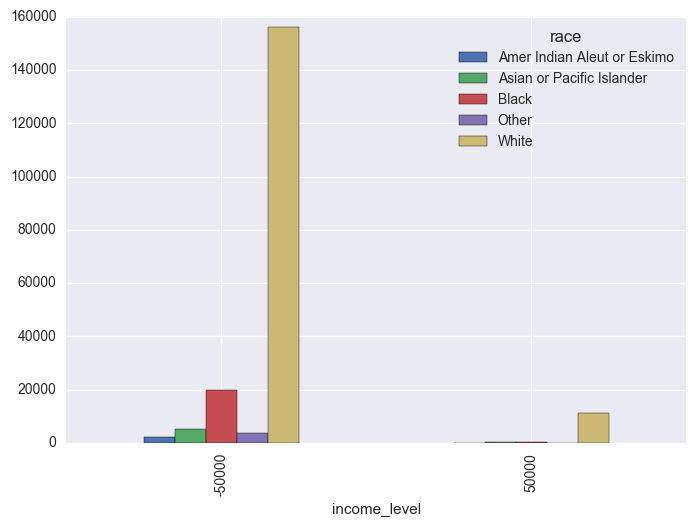

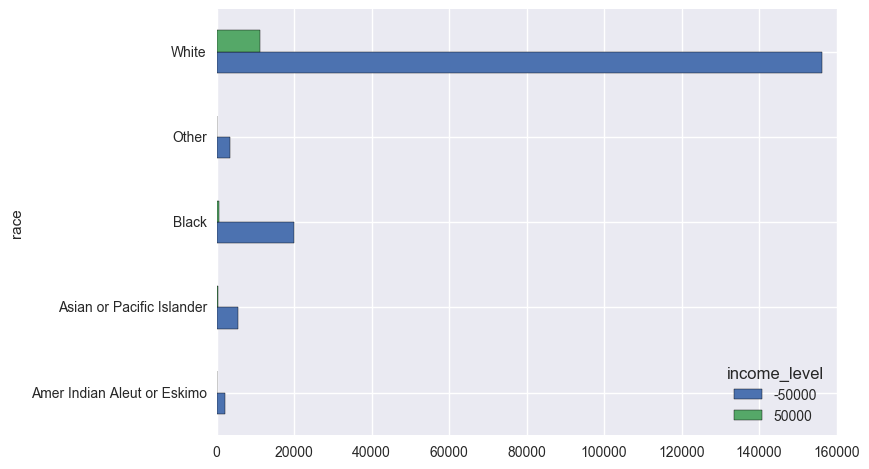

In [29]:
plt.figure(1)
pd.crosstab(train['income_level'],train['race']).plot(kind='bar')

plt.figure(2)
pd.crosstab(train['race'],train['income_level']).plot(kind='barh')

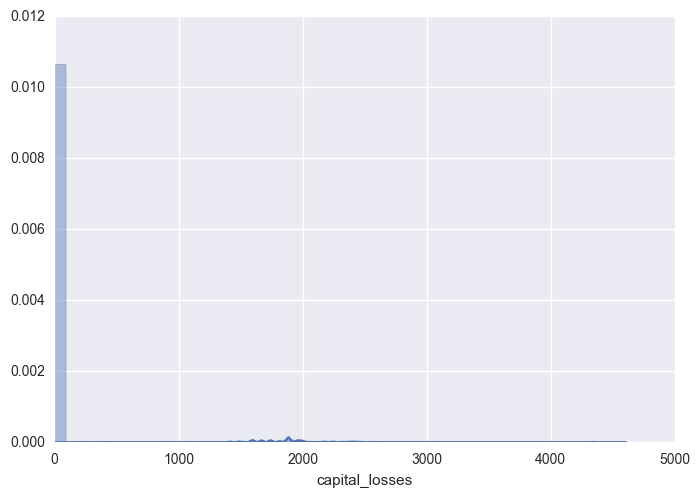

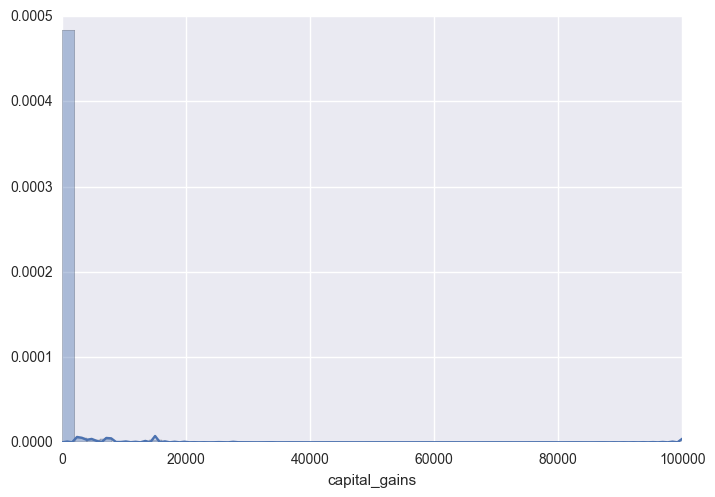

In [30]:
#Except whites all other races have incomes less than 50000.
#Now lets check if capital losses and gains have anything to do with income level

plt.figure(1)
sns.distplot(train['capital_losses'])

plt.figure(2)
sns.distplot(train['capital_gains'])

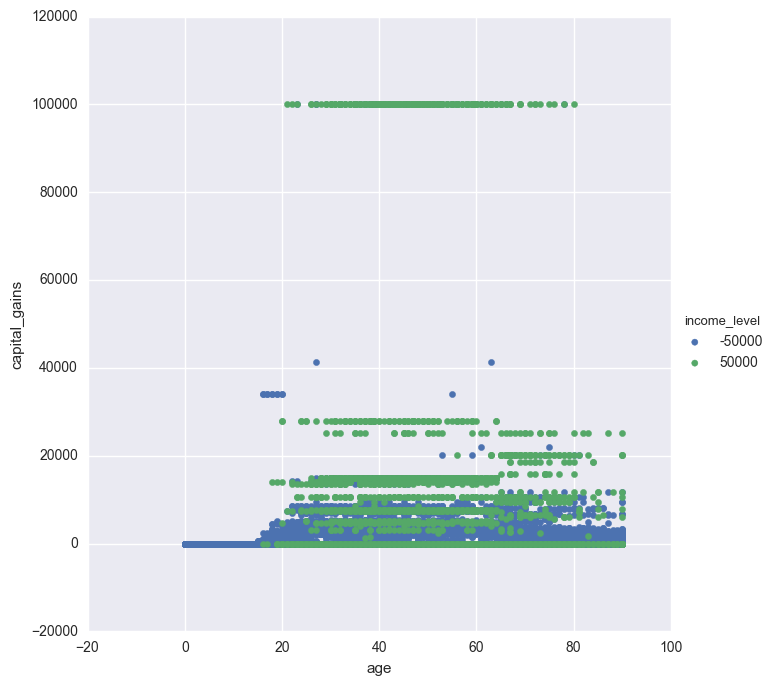

In [31]:
g=sns.FacetGrid(train,hue='income_level',size=7)
g.map(plt.scatter,"age","capital_gains").add_legend()

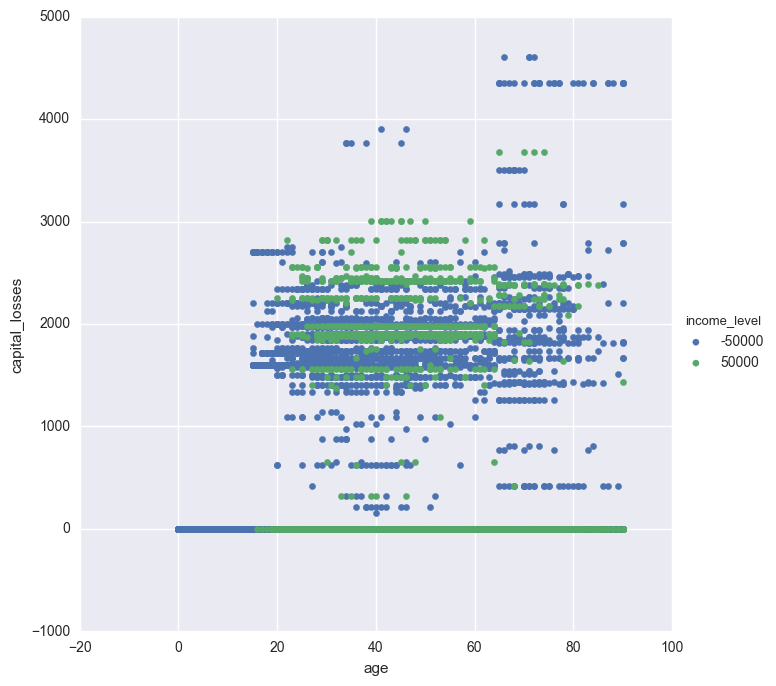

In [32]:
g=sns.FacetGrid(train,hue='income_level',size=7)
g.map(plt.scatter,"age","capital_losses").add_legend()

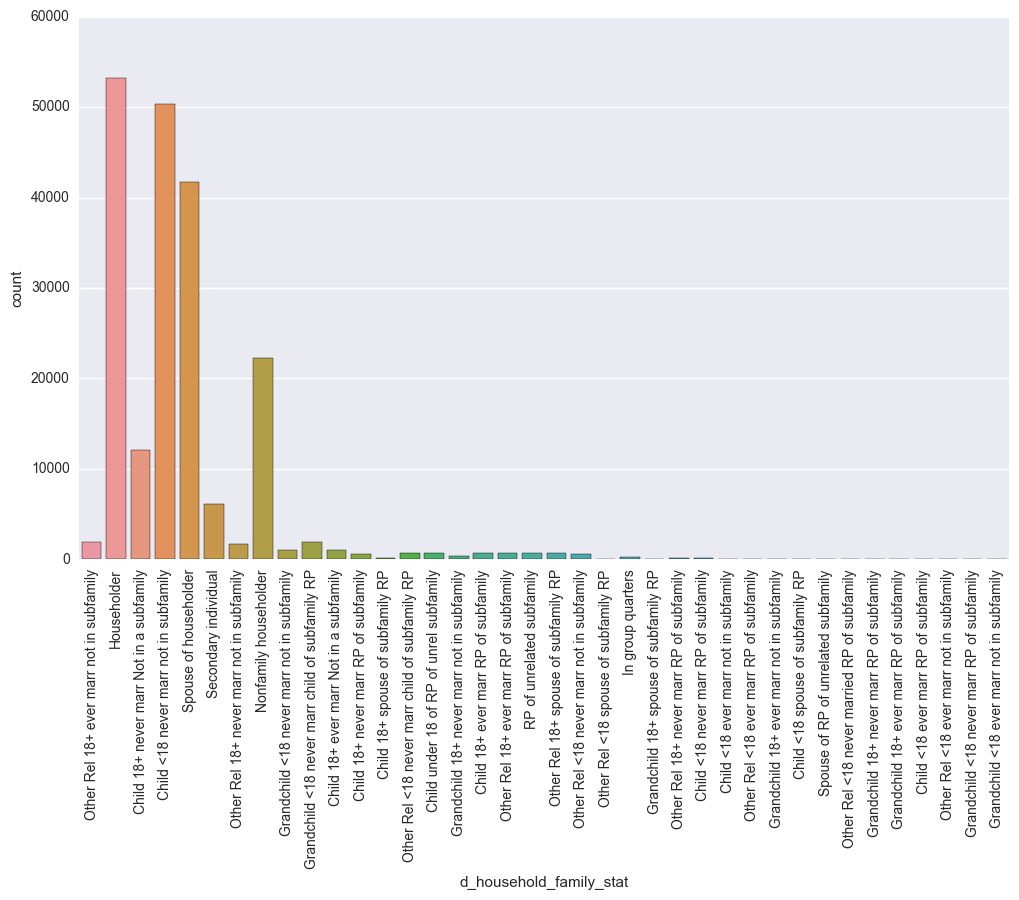

In [33]:
plt.figure(figsize=(12,7))
sns.countplot(train['d_household_family_stat'])
ax=plt.xticks(rotation=90)

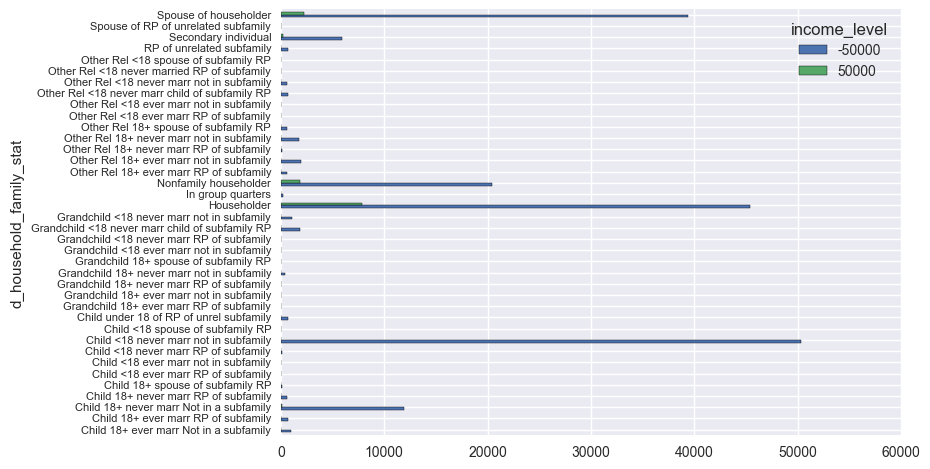

In [34]:
plt.figure(1,figsize=(7,12))
pd.crosstab(train['d_household_family_stat'],train['income_level']).plot(kind='barh')
ax=plt.yticks(size=8)

In [35]:
#Let us reduce the levels of categorical variables with a threshold of 5%. We find the features which contain the high
#est amount of data with levels having less than 5% data


for column in train.select_dtypes(['object']).columns:
    frequencies={}
    levels_dict=dict(train[column].value_counts())
    for i in levels_dict:
        frequencies[i]=(float(levels_dict[i])*100.0)/float(train[column].value_counts().sum())

    for x in frequencies:
        if frequencies[x]<=5.0:
             train[column][train[column]==x]='Other'+str(column)

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
#Lets do the same for test columns

for column in test.select_dtypes(['object']).columns:
    frequencies={}
    levels_dict=dict(test[column].value_counts())
    for i in levels_dict:
        frequencies[i]=(float(levels_dict[i])*100.0)/float(test[column].value_counts().sum())

    for x in frequencies:
        if frequencies[x]<=5.0:
             test[column][test[column]==x]='Other'+str(column)

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
train.replace(to_replace={-50000,50000},value={0,1},inplace=True)
test.replace(to_replace={-50000,50000},value={0,1},inplace=True)

In [38]:
train.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,193.269372,1.956180,0.175438,1.514833,23.174897,94.499672,0.937942
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1930.171289,2.365126,0.553694,0.851473,24.411488,0.500001,0.241261
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,1.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,1.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,1.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [39]:
#Now lets convert the caegorical data to numerical data

data_objects=train.select_dtypes(['object']).columns
data_objects2=test.select_dtypes(['object']).columns
lb=LabelEncoder()

for obj in data_objects:
    x=lb.fit_transform(train[obj])
    train.drop(obj,1,inplace=True)
    train[obj]=x

for obj in data_objects2:   
    x=lb.fit_transform(test[obj])
    test.drop(obj,1,inplace=True)
    test[obj]=x

In [40]:
train.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,...,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,...,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,193.269372,1.956180,0.175438,1.514833,...,1.085995,1.085995,1.334623,1.978288,1.562948,1.747558,0.804313,0.887061,0.978594,0.009944
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1930.171289,2.365126,0.553694,0.851473,...,0.951818,0.951818,0.617057,1.058630,0.819907,0.537620,0.396729,0.316519,0.335361,0.099221
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000


In [41]:
train_=train
test_=test

train_labels=train['income_level']
test_labels=test['income_level']

train.drop(['income_level','age_categories'],1,inplace=True)
test.drop(['income_level','age_categories'],1,inplace=True)

In [42]:
#We will normalize the data



#Train data
scaler1=StandardScaler(with_mean=True,with_std=True)
scaled_features1=scaler1.fit_transform(train)
scaled_train=pd.DataFrame(scaled_features1,index=train.index,columns=train.columns)

#Test data
scaler2=StandardScaler(with_mean=True,with_std=True)
scaled_features2=scaler2.fit_transform(test)
scaled_test=pd.DataFrame(scaled_features2,index=test.index,columns=test.columns)

scaled_train['income']=train_labels
scaled_test['income']=test_labels

In [43]:
#Lets see the feature importances

forest=RandomForestClassifier(n_estimators=100,n_jobs=-1)
forest.fit(scaled_train.drop('income',1),scaled_train['income'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

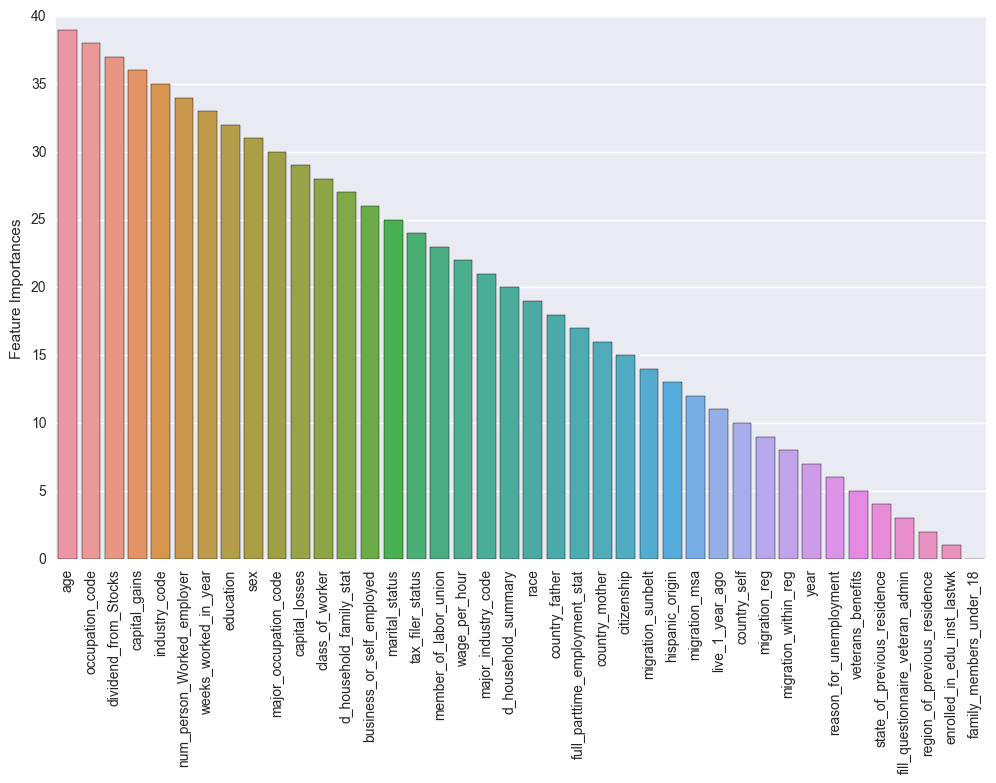

In [44]:
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
feature=scaled_train.drop('income',1).columns
plt.figure(figsize = (12,7))
ax=sns.barplot(x=importances[indices],y=range(len(indices)))
ax = plt.xticks(range(len(indices)),feature[indices],rotation=90)
plt.ylabel('Feature Importances')



In [45]:
#Arranging the features according to the feature importances

train_labels_=scaled_train['income']
test_labels_=scaled_test['income']
train3=scaled_train.drop('income',1).ix[:,indices].join(train_labels_)
test3=scaled_test.drop('income',1).ix[:,indices].join(test_labels_)

In [46]:
#Training,Validation and Testing sets

TRAIN,VAL=train_test_split(train3,train_size=0.8)
TEST=test3
X_TRAIN,Y_TRAIN=TRAIN.drop('income',1),TRAIN['income']
X_VAL,Y_VAL=VAL.drop('income',1),VAL['income']
X_TEST,Y_TEST=TEST.drop('income',1),TEST['income']

In [47]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_TRAIN,Y_TRAIN)
y_val_pred1=logreg.predict(X_VAL)
accuracy_val1=accuracy_score(y_val_pred1,Y_VAL)

y_test_pred1=logreg.predict(X_TEST)
accuracy_test1=accuracy_score(y_test_pred1,Y_TEST)

'Validation RMSE= '+str(accuracy_val1)+'     '+'Test RMSE= '+str(accuracy_test1)+'    '+'Score= '+str(logreg.score(X_TEST,Y_TEST))

'Validation RMSE= 0.947450194211     Test RMSE= 0.946853511357    Score= 0.946853511357'

In [48]:
#Random Forest

model=RandomForestClassifier(n_estimators=400)
model.fit(X_TRAIN,Y_TRAIN)
y_val_pred2=model.predict(X_VAL)
accuracy_val2=accuracy_score(y_val_pred2,Y_VAL)

y_test_pred2=model.predict(X_TEST)
accuracy_test2=accuracy_score(y_test_pred2,Y_TEST)

'Validation RMSE= '+str(accuracy_val2)+'     '+'Test RMSE= '+str(accuracy_test2)+'    '+'Score= '+str(model.score(X_TEST,Y_TEST))

'Validation RMSE= 0.952888109259     Test RMSE= 0.951103626631    Score= 0.951103626631'

In [51]:
#XGBoost

model=xgb.XGBClassifier(n_estimators=300,max_depth=3)
model.fit(X_TRAIN,Y_TRAIN)
y_val_pred3=model.predict(X_VAL)
accuracy_val3=accuracy_score(y_val_pred3,Y_VAL)

y_test_pred3=model.predict(X_TEST)
accuracy_test3=accuracy_score(y_test_pred3,Y_TEST)

'Validation RMSE= '+str(accuracy_val3)+'     '+'Test RMSE= '+str(accuracy_test3)+'    '+'Score= '+str(model.score(X_TEST,Y_TEST))

'Validation RMSE= 0.954516977822     Test RMSE= 0.95216615545    Score= 0.95216615545'